# KNN Regression

Read more at https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


## Read Data from CSV

In [3]:
#dfTrain = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTrainingData.csv')  

import requests
import io
url="https://manmohan291.s3.ap-south-1.amazonaws.com/LinearRegressionDS/LinearRegressionTrainingData.csv"
s=requests.get(url).content
dfTrain=pd.read_csv(io.StringIO(s.decode('utf-8')))



In [4]:
dfTrain.head()

,X,Y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


<h5> Visualize Data

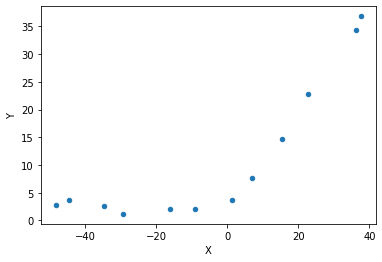

In [5]:
dfTrain.plot(x='X',y='Y',kind='scatter')
plt.show()

## Training

In [28]:
#import sklearn.linear_model  as LR
import sklearn.neighbors as KNN

df_Features=dfTrain.iloc[:,0:1]
df_Label=dfTrain.iloc[:,1:2]

X=np.array([[1],[2],[3]])
Y=np.array([[1],[2],[2]])
K=3
RegObj=KNN.KNeighborsRegressor(n_neighbors = K).fit(X,Y)

## Predict

In [29]:
RegObj.predict([[5]])

array([[1.66666667]])

In [30]:
X.shape

(3, 1)

## Plotting

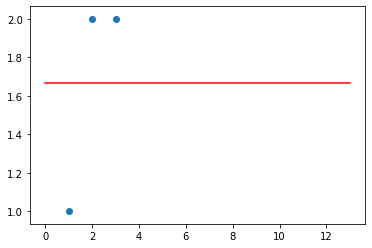

In [31]:
plt.scatter(X,Y) 
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+10 
u = np.linspace(x_min, x_max, 100)

u.shape=(len(u),1)

newx=u
newy=RegObj.predict(newx)

plt.plot(newx,newy,color='r') 
plt.show()

## RMSE Evaluation

In [8]:
from sklearn.metrics import mean_squared_error
pY=RegObj.predict(X)
mse=mean_squared_error(Y, pY)
rmse=np.sqrt(mse)
print("RMSE={0:.2f}".format(rmse))

RMSE=1.93


# Implement KNN your own


## KNN Regression Algorithm


- <b>Step1: Choose K neighbors using Distance function</b>
  


- <b>Step2: Average K neighbours</b> 
    
    
    

<P><h2>Distance Functions (Continuous Data) </h2>
    <p>Ecludian Distance $=  \displaystyle \sqrt{\sum _{i=1}^n (X_i- Y_i)^2}$


### Try out prediction for example X=[[0]]

In [9]:
newX=np.array([[0]])
trainBatchSize=X.shape[0]
predictBatchSize=newX.shape[0]
pY=np.zeros((newX.shape[0],1))

distanceList=np.zeros(Y.shape)

for i in range(predictBatchSize): # For each row/element to be predicted

    #Step1:Calculate Distances
    distanceValues=np.linalg.norm(newX[i,:]-X,axis=1)
    distanceList=np.column_stack((distanceValues,Y)) # Stack together for easy sorting

    #Step2: Sort Distances on basis of distances
    sortedList=distanceList[distanceList[:,0].argsort()]


    #Step3: Pick top K
    topKList=sortedList[:K,:]

    

    #Step4: Predict using uniform weighted i.e. mean of Y among top K    
    predY=topKList[:,1].mean()
   
    pY[i]=predY


### Formalize above code as function

In [10]:
def My_KNN_Predict(newX,X,Y,K):
    trainBatchSize=X.shape[0]
    predictBatchSize=newX.shape[0]
    pY=np.zeros((newX.shape[0],1))

    distanceList=np.zeros(Y.shape)

    for i in range(predictBatchSize): 

        #Step1:Calculate Distances
        distanceValues=np.linalg.norm(newX[i,:]-X,axis=1)
        distanceList=np.column_stack((distanceValues,Y))

        #Step2: Sort Distances
        sortedList=distanceList[distanceList[:,0].argsort()]


        #Step3: Pick top K
        topKList=sortedList[:K,:]



        #Step4: GetMost mean of Y among top K    
        predY=topKList[:,1].mean()

        pY[i]=predY
            
                    
    
    return pY

## Predict

In [11]:
My_KNN_Predict(np.array([[5]]),X,Y,K)

array([[8.69269961]])

## Plotting

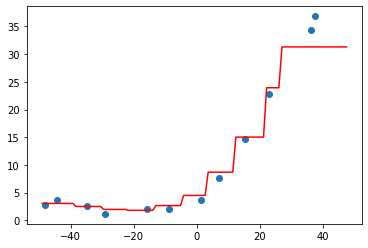

In [12]:
plt.scatter(X,Y) 
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+10 
u = np.linspace(x_min, x_max, 100)

u.shape=(len(u),1)
newx=u
newy=My_KNN_Predict(newx,X,Y,K)

plt.plot(newx,newy,color='r') 
plt.show()

In [13]:
def getRMSE(aY,pY):
    Error=aY- pY
    ErrorSqr=Error**2
    MSE=ErrorSqr.mean()
    RMSE=np.sqrt(MSE)
    return RMSE

<h5>RMSE on Training Data

In [14]:
pY=My_KNN_Predict(X,X,Y,K)
rmse=getRMSE(Y, pY)
print("RMSE={0:.2f}".format(rmse))

RMSE=1.93
